# Kaggle Airbnb - Preprocessing Train with All Train Features

In [1]:
import glob

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cross_validation import LeaveOneOut, cross_val_score
import sklearn.cross_validation as cv

from matplotlib import pyplot as plt
%matplotlib inline

In [47]:
#ls

In [48]:
#dateparse = lambda x: pd.datetime.strptime(x, '%y/%m/%d %H:%M')

#countries = pd.read_csv('../../Kaggle/Airbnb/countries.csv')
#age = pd.read_csv('../../Kaggle/Airbnb/age_gender_bkts.csv')
#test = pd.read_csv('../../Kaggle/Airbnb/test_users.csv', \
                         #parse_dates=['date_account_created', 'timestamp_first_active', 'date_first_booking'])
#sample = pd.read_csv('../../Kaggle/Airbnb/sample_submission_NDF.csv')
#sessions = pd.read_csv('../../Kaggle/Airbnb/sessions.csv')
train = pd.read_csv('../../Kaggle/Airbnb/train_users_2.csv', nrows=150000,\
                            parse_dates=['date_account_created', 'timestamp_first_active', 'date_first_booking'])



In [49]:
#print(age_gender_bkts.shape)
#print(age_gender_bkts.head())
#print(test_users.head())
#test_users.shape
#print(sample_submission_NDF.head())
#sample_submission_NDF.shape
#print(sessions.head())
#sessions[sessions['user_id'] == 'd1mm9tcy42']
#print(train_users_2.shape)
#print(train_users_2.head())
#print(train_users_2['gender'].unique())
#print(train_users_2['gender'].value_counts())
#print(train_users_2['age'].value_counts())
#train_users_2[train_users_2['age'] == 2014]
#allusers = pd.concat((train_users_2, test_users), axis=0, ignore_index=True)

In [50]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [51]:
train['dac_dayofweek'] = [i.dayofweek for i in train['date_account_created']]
train['dac_day'] = [i.dayofyear for i in train['date_account_created']]
train['dac_month'] = [i.month for i in train['date_account_created']]
train['dac_year'] = [i.year for i in train['date_account_created']]
train['tfa_dayofweek'] = [i.dayofweek for i in train['timestamp_first_active']]
train['tfa_day'] = [i.dayofyear for i in train['timestamp_first_active']]
train['tfa_month'] = [i.month for i in train['timestamp_first_active']]
train['tfa_year'] = [i.year for i in train['timestamp_first_active']]
train['tfa_hour'] = [i.hour for i in train['timestamp_first_active']]
train['dfb_dayofweek'] = [i.dayofweek for i in train['date_first_booking']]
train['dfb_day'] = [i.dayofyear for i in train['date_first_booking']]
train['dfb_month'] = [i.month for i in train['date_first_booking']]
train['dfb_year'] = [i.year for i in train['date_first_booking']]

In [52]:
print(pd.unique(train['gender']))
gd = pd.get_dummies(train['gender'])
train = train.merge(gd, suffixes=('', ''),
                            left_index=True, right_index=True)

['-unknown-' 'MALE' 'FEMALE' 'OTHER']


In [53]:
train

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,tfa_year,tfa_hour,dfb_dayofweek,dfb_day,dfb_month,dfb_year,-unknown-,FEMALE,MALE,OTHER
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,...,2009,4,NaN,NaN,NaN,NaN,1,0,0,0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38,facebook,0,en,seo,...,2009,17,NaN,NaN,NaN,NaN,0,0,1,0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56,basic,3,en,direct,...,2009,23,0,214,8,2010,0,1,0,0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42,facebook,0,en,direct,...,2009,6,5,252,9,2012,0,1,0,0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41,basic,0,en,direct,...,2009,6,3,49,2,2010,1,0,0,0
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,-unknown-,NaN,basic,0,en,other,...,2010,21,5,2,1,2010,1,0,0,0
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46,basic,0,en,other,...,2010,1,1,5,1,2010,0,1,0,0
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47,basic,0,en,direct,...,2010,19,2,13,1,2010,0,1,0,0
8,a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,FEMALE,50,basic,0,en,other,...,2010,0,3,210,7,2010,0,1,0,0
9,6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,2010-01-04,-unknown-,46,basic,0,en,other,...,2010,2,0,4,1,2010,1,0,0,0


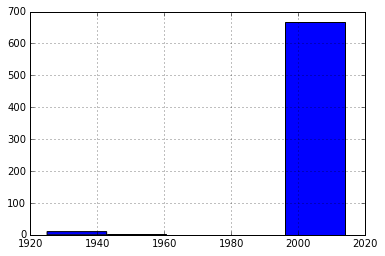

In [54]:
train[train.age > 1000].age.hist(bins=5)

In [55]:
train['age'] = train['age'].apply(lambda x: (2016 - x) if x > 1916 else x)

In [56]:
train[train['age'] > 97] = np.NaN
train[train['age'] < 15] = np.NaN

In [57]:
train['age'].mean()

37.08210390550754

In [58]:
train['age'] = train['age'].fillna(train['age'].mean())

In [59]:
train

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,tfa_year,tfa_hour,dfb_dayofweek,dfb_day,dfb_month,dfb_year,-unknown-,FEMALE,MALE,OTHER
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,37.082104,facebook,0,en,direct,...,2009,4,NaN,NaN,NaN,NaN,1,0,0,0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.000000,facebook,0,en,seo,...,2009,17,NaN,NaN,NaN,NaN,0,0,1,0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.000000,basic,3,en,direct,...,2009,23,0,214,8,2010,0,1,0,0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,...,2009,6,5,252,9,2012,0,1,0,0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.000000,basic,0,en,direct,...,2009,6,3,49,2,2010,1,0,0,0
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,-unknown-,37.082104,basic,0,en,other,...,2010,21,5,2,1,2010,1,0,0,0
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.000000,basic,0,en,other,...,2010,1,1,5,1,2010,0,1,0,0
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.000000,basic,0,en,direct,...,2010,19,2,13,1,2010,0,1,0,0
8,a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,FEMALE,50.000000,basic,0,en,other,...,2010,0,3,210,7,2010,0,1,0,0
9,6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,2010-01-04,-unknown-,46.000000,basic,0,en,other,...,2010,2,0,4,1,2010,1,0,0,0


In [60]:
train.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'dac_dayofweek', 'dac_day',
       'dac_month', 'dac_year', 'tfa_dayofweek', 'tfa_day', 'tfa_month',
       'tfa_year', 'tfa_hour', 'dfb_dayofweek', 'dfb_day', 'dfb_month',
       'dfb_year', '-unknown-', 'FEMALE', 'MALE', 'OTHER'],
      dtype='object')

In [61]:
print(pd.unique(train['signup_method']))
sm = pd.get_dummies(train['signup_method'])
train = train.merge(sm, suffixes=('train', ''),
                            left_index=True, right_index=True)

['facebook' 'basic' nan]


In [62]:
print(pd.unique(train['language']))
lang = pd.get_dummies(train['language'])
train = train.merge(lang, suffixes=('train', ''),
                            left_index=True, right_index=True)

['en' 'fr' nan 'de' 'es' 'it' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'pt' 'nl'
 'hu' 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is']


In [63]:
print(pd.unique(train['affiliate_channel']))
ac = pd.get_dummies(train['affiliate_channel'])
train = train.merge(ac, suffixes=('', ''),
                            left_index=True, right_index=True)

['direct' 'seo' 'other' 'sem-non-brand' 'content' nan 'sem-brand'
 'remarketing' 'api']


In [64]:
print(pd.unique(train['affiliate_provider']))
ap = pd.get_dummies(train['affiliate_provider'])
train = train.merge(ap, suffixes=('train', ''),
                            left_index=True, right_index=True)

['direct' 'google' 'other' 'craigslist' 'facebook' nan 'vast' 'bing'
 'meetup' 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp'
 'wayn' 'naver' 'baidu' 'yandex']


In [65]:
print(pd.unique(train['first_affiliate_tracked']))
fat = pd.get_dummies(train['first_affiliate_tracked'])
train = train.merge(fat, suffixes=('', ''),
                            left_index=True, right_index=True)

['untracked' 'omg' nan 'linked' 'tracked-other' 'product' 'marketing'
 'local ops']


In [66]:
print(pd.unique(train['signup_app']))
sa = pd.get_dummies(train['signup_app'])
train = train.merge(sa, suffixes=('', ''),
                            left_index=True, right_index=True)

['Web' nan 'Moweb' 'iOS' 'Android']


In [67]:
print(pd.unique(train['first_device_type']))
fdt = pd.get_dummies(train['first_device_type'])
train = train.merge(fdt, suffixes=('', ''),
                            left_index=True, right_index=True)


['Mac Desktop' 'Windows Desktop' 'iPhone' 'Other/Unknown' 'Desktop (Other)'
 'Android Tablet' 'iPad' 'Android Phone' nan 'SmartPhone (Other)']


In [68]:
print(pd.unique(train['first_browser']))
train.first_browser = train.first_browser.str.replace('-unknown-', 'notknown')
print('-------')
print(pd.unique(train['first_browser']))
fb = pd.get_dummies(train['first_browser'])
train = train.merge(fb, suffixes=('train', ''),
                            left_index=True, right_index=True)

['Chrome' 'IE' 'Firefox' 'Safari' '-unknown-' 'Mobile Safari'
 'Chrome Mobile' nan 'RockMelt' 'Chromium' 'Android Browser' 'AOL Explorer'
 'Palm Pre web browser' 'Opera' 'TenFourFox' 'Mobile Firefox' 'IE Mobile'
 'Apple Mail' 'Silk' 'Camino' 'Arora' 'BlackBerry Browser' 'SeaMonkey'
 'Iron' 'Sogou Explorer' 'IceWeasel' 'Opera Mini' 'SiteKiosk' 'Maxthon'
 'Kindle Browser' 'CoolNovo' 'Conkeror' 'wOSBrowser' 'Google Earth'
 'Crazy Browser' 'Mozilla' 'OmniWeb' 'PS Vita browser' 'NetNewsWire'
 'CometBird' 'Comodo Dragon' 'Flock' 'Pale Moon' 'Avant Browser'
 'Opera Mobile' 'Yandex.Browser' 'TheWorld Browser' 'SlimBrowser' 'Epic'
 'Stainless']
-------
['Chrome' 'IE' 'Firefox' 'Safari' 'notknown' 'Mobile Safari'
 'Chrome Mobile' nan 'RockMelt' 'Chromium' 'Android Browser' 'AOL Explorer'
 'Palm Pre web browser' 'Opera' 'TenFourFox' 'Mobile Firefox' 'IE Mobile'
 'Apple Mail' 'Silk' 'Camino' 'Arora' 'BlackBerry Browser' 'SeaMonkey'
 'Iron' 'Sogou Explorer' 'IceWeasel' 'Opera Mini' 'SiteKiosk' 'Max

In [74]:
train.head()

,age,signup_flow,country_destination,dac_dayofweek,dac_day,dac_month,dac_year,tfa_dayofweek,tfa_day,tfa_month,...,Silk,SiteKiosk,SlimBrowser,Sogou Explorer,Stainless,TenFourFox,TheWorld Browser,Yandex.Browser,notknown,wOSBrowser
0,37,0,NDF,0,179,6,2010,3,78,3,...,0,0,0,0,0,0,0,0,0,0
1,38,0,NDF,2,145,5,2011,5,143,5,...,0,0,0,0,0,0,0,0,0,0
2,56,3,US,1,271,9,2010,1,160,6,...,0,0,0,0,0,0,0,0,0,0
3,42,0,other,0,339,12,2011,5,304,10,...,0,0,0,0,0,0,0,0,0,0
4,41,0,US,1,257,9,2010,1,342,12,...,0,0,0,0,0,0,0,0,0,0


In [75]:
print(list(train.columns))

['age', 'signup_flow', 'country_destination', 'dac_dayofweek', 'dac_day', 'dac_month', 'dac_year', 'tfa_dayofweek', 'tfa_day', 'tfa_month', 'tfa_year', 'tfa_hour', 'dfb_dayofweek', 'dfb_day', 'dfb_month', 'dfb_year', '-unknown-', 'FEMALE', 'MALE', 'OTHER', 'basic', 'facebooktrain', 'ca', 'cs', 'da', 'de', 'el', 'en', 'es', 'fi', 'fr', 'hr', 'hu', 'id', 'is', 'it', 'ja', 'ko', 'nl', 'no', 'pl', 'pt', 'ru', 'sv', 'th', 'tr', 'zh', 'api', 'content', 'directtrain', 'othertrain', 'remarketing', 'sem-brand', 'sem-non-brand', 'seo', 'baidu', 'bing', 'craigslist', 'direct', 'email-marketing', 'facebook', 'facebook-open-graph', 'google', 'gsp', 'meetup', 'naver', 'other', 'padmapper', 'vast', 'wayn', 'yahoo', 'yandex', 'linked', 'local ops', 'marketing', 'omg', 'product', 'tracked-other', 'untracked', 'Android', 'Moweb', 'Web', 'iOS', 'Android Phone', 'Android Tablet', 'Desktop (Other)', 'Mac Desktop', 'Other/Unknown', 'SmartPhone (Other)', 'Windows Desktop', 'iPad', 'iPhone', 'AOL Explorer', '

In [71]:
train.drop(labels=['idtrain'], axis=1, inplace=True)
train.drop(labels=['date_account_created'], axis=1, inplace=True)
train.drop(labels=['timestamp_first_active'], axis=1, inplace=True)
train.drop(labels=['date_first_booking'], axis=1, inplace=True)
train.drop(labels=['gender'], axis=1, inplace=True)
train.drop(labels=['signup_method'], axis=1, inplace=True)
train.drop(labels=['language'], axis=1, inplace=True)
train.drop(labels=['affiliate_channel'], axis=1, inplace=True)
train.drop(labels=['affiliate_provider'], axis=1, inplace=True)
train.drop(labels=['first_affiliate_tracked'], axis=1, inplace=True)
train.drop(labels=['signup_app'], axis=1, inplace=True)
train.drop(labels=['first_device_type'], axis=1, inplace=True)
train.drop(labels=['first_browser'], axis=1, inplace=True)

In [72]:
train['age'] = train['age'].apply(lambda x: int(x))

In [76]:
feature_cols = ['age', 'signup_flow', 'dac_dayofweek', \
                'dac_day', 'dac_month', 'dac_year', 'tfa_dayofweek', 'tfa_day', 'tfa_month', 'tfa_year', \
                'tfa_hour', 'dfb_dayofweek', 'dfb_day', 'dfb_month', 'dfb_year', '-unknown-', 'FEMALE', 'MALE', \
                'OTHER', 'basic', 'facebooktrain', 'ca', 'cs', 'da', 'de', 'el', 'en', 'es', 'fi', 'fr', 'hr', \
                'hu', 'id', 'is', 'it', 'ja', 'ko', 'nl', 'no', 'pl', 'pt', 'ru', 'sv', 'th', 'tr', 'zh', 'api', \
                'content', 'directtrain', 'othertrain', 'remarketing', 'sem-brand', 'sem-non-brand', 'seo', \
                'baidu', 'bing', 'craigslist', 'direct', 'email-marketing', 'facebook', 'facebook-open-graph', \
                'google', 'gsp', 'meetup', 'naver', 'other', 'padmapper', 'vast', 'wayn', 'yahoo', 'yandex', \
                'linked', 'local ops', 'marketing', 'omg', 'product', 'tracked-other', 'untracked', 'Android', \
                'Moweb', 'Web', 'iOS', 'Android Phone', 'Android Tablet', 'Desktop (Other)', 'Mac Desktop', \
                'Other/Unknown', 'SmartPhone (Other)', 'Windows Desktop', 'iPad', 'iPhone', 'AOL Explorer', \
                'Android Browser', 'Apple Mail', 'Arora', 'Avant Browser', 'BlackBerry Browser', 'Camino', \
                'Chrome', 'Chrome Mobile', 'Chromium', 'CometBird', 'Comodo Dragon', 'Conkeror', 'CoolNovo', \
                'Crazy Browser', 'Epic', 'Firefox', 'Flock', 'Google Earth', 'IE', 'IE Mobile', 'IceWeasel', \
                'Iron', 'Kindle Browser', 'Maxthon', 'Mobile Firefox', 'Mobile Safari', 'Mozilla', 'NetNewsWire', \
                'OmniWeb', 'Opera', 'Opera Mini', 'Opera Mobile', 'PS Vita browser', 'Pale Moon', \
                'Palm Pre web browser', 'RockMelt', 'Safari', 'SeaMonkey', 'Silk', 'SiteKiosk', 'SlimBrowser', \
                'Sogou Explorer', 'Stainless', 'TenFourFox', 'TheWorld Browser', 'Yandex.Browser', 'notknown', \
                'wOSBrowser']


X = train[feature_cols]
y = train['country_destination'].ravel()

print(X.shape, y.shape)

(150000, 140) (150000,)


In [77]:
y

array(['NDF', 'NDF', 'US', ..., 'NDF', 'other', 'NDF'], dtype=object)

In [78]:
le = preprocessing.LabelEncoder()
le = le.fit(list(y))
ylabel = le.fit_transform(list(y))
ylabel

array([ 7,  7, 10, ...,  7, 12,  7])

In [79]:
#X.isnull().sum()
X = X.fillna(0)

In [80]:
X.isnull().any().any()

False

In [81]:
#Random Forest Classifier

rfr = RandomForestClassifier()
rfr.fit(X, ylabel)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [82]:
rfr.score(X, ylabel)

0.99106000000000005

In [83]:
y_pred = rfr.predict(X)
y_pred

array([ 7,  7, 10, ...,  7, 10,  7])

In [84]:
metrics.accuracy_score(ylabel, y_pred)
#Overfitting

0.99106000000000005

In [85]:
#le.inverse_transform(y_pred)

In [86]:
print(mean_squared_error(ylabel, y_pred)) 
#Little error, so it looks like we are overfitting.
#Therefore, we want to use a cross validation, train test split to get more accurate measure of actual error

0.202086666667


In [87]:
#pd.DataFrame({'ylabel': ylabel,'y_pred': y_pred, 'error': np.abs(ylabel - y_pred)})

In [88]:
#Random Forest, Cross Validation
print(cross_val_score(rfr, X, ylabel, cv = 3))
np.mean(cross_val_score(rfr, X, ylabel, cv = 3)) 

[ 0.62475752  0.73696948  0.7082825 ]


0.68200939970984908

In [89]:
#K-Nearest Neighbor Classifier

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X, ylabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [90]:
knn.predict(X)

array([ 7,  7, 10, ...,  7, 12,  7])

In [91]:
knn.score(X, ylabel)

0.99987999999999999

In [92]:
#Nearest Neighbor, Cross Validation
print(cross_val_score(knn, X, ylabel, cv = 3))
np.mean(cross_val_score(knn, X, ylabel, cv = 3))

[ 0.77560244  0.76321053  0.79260756]


0.7771401748768495

Feature ranking:
1. feature 12 (0.256100)
2. feature 13 (0.214378)
3. feature 14 (0.143273)
4. feature 11 (0.047389)
5. feature 0 (0.038746)
6. feature 3 (0.035866)
7. feature 7 (0.032636)
8. feature 10 (0.032398)
9. feature 5 (0.017576)
10. feature 6 (0.016451)
11. feature 2 (0.016103)
12. feature 4 (0.010508)
13. feature 8 (0.010476)
14. feature 15 (0.010387)
15. feature 9 (0.008739)
16. feature 26 (0.007214)
17. feature 16 (0.005859)
18. feature 1 (0.005819)
19. feature 98 (0.005660)
20. feature 20 (0.005657)
21. feature 77 (0.005563)
22. feature 107 (0.005196)
23. feature 19 (0.005044)
24. feature 17 (0.004811)
25. feature 85 (0.004742)
26. feature 88 (0.004537)
27. feature 71 (0.004322)
28. feature 128 (0.004202)
29. feature 48 (0.003740)
30. feature 74 (0.002988)
31. feature 110 (0.002886)
32. feature 117 (0.002023)
33. feature 61 (0.001952)
34. feature 89 (0.001906)
35. feature 52 (0.001846)
36. feature 51 (0.001728)
37. feature 57 (0.001644)
38. feature 90 (0.001372)
39. featur

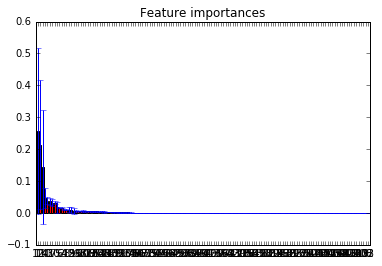

In [93]:
#Feature Ranking

rfr.fit(X, ylabel)
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [275]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Columns: 140 entries, age to wOSBrowser
dtypes: float64(139), int64(1)
memory usage: 161.4 MB


In [96]:
list(X.columns)

['age',
 'signup_flow',
 'dac_dayofweek',
 'dac_day',
 'dac_month',
 'dac_year',
 'tfa_dayofweek',
 'tfa_day',
 'tfa_month',
 'tfa_year',
 'tfa_hour',
 'dfb_dayofweek',
 'dfb_day',
 'dfb_month',
 'dfb_year',
 '-unknown-',
 'FEMALE',
 'MALE',
 'OTHER',
 'basic',
 'facebooktrain',
 'ca',
 'cs',
 'da',
 'de',
 'el',
 'en',
 'es',
 'fi',
 'fr',
 'hr',
 'hu',
 'id',
 'is',
 'it',
 'ja',
 'ko',
 'nl',
 'no',
 'pl',
 'pt',
 'ru',
 'sv',
 'th',
 'tr',
 'zh',
 'api',
 'content',
 'directtrain',
 'othertrain',
 'remarketing',
 'sem-brand',
 'sem-non-brand',
 'seo',
 'baidu',
 'bing',
 'craigslist',
 'direct',
 'email-marketing',
 'facebook',
 'facebook-open-graph',
 'google',
 'gsp',
 'meetup',
 'naver',
 'other',
 'padmapper',
 'vast',
 'wayn',
 'yahoo',
 'yandex',
 'linked',
 'local ops',
 'marketing',
 'omg',
 'product',
 'tracked-other',
 'untracked',
 'Android',
 'Moweb',
 'Web',
 'iOS',
 'Android Phone',
 'Android Tablet',
 'Desktop (Other)',
 'Mac Desktop',
 'Other/Unknown',
 'SmartPhone 

In [51]:
#logistic - multivariate logistic classification

In [52]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Columns: 146 entries, age to wOSBrowser
dtypes: float64(144), int64(1), object(1)
memory usage: 239.4+ MB


In [287]:
list(test.columns)

['id',
 'date_account_created',
 'timestamp_first_active',
 'date_first_booking',
 'gender',
 'age',
 'signup_method',
 'signup_flow',
 'language',
 'affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'signup_app',
 'first_device_type',
 'first_browser']

In [286]:
list(train.columns)

['age',
 'signup_flow',
 'country_destination',
 'dac_dayofweek',
 'dac_day',
 'dac_month',
 'dac_year',
 'tfa_dayofweek',
 'tfa_day',
 'tfa_month',
 'tfa_year',
 'tfa_hour',
 'dfb_dayofweek',
 'dfb_day',
 'dfb_month',
 'dfb_year',
 '-unknown-train',
 'FEMALE',
 'MALE',
 'OTHER',
 'basic',
 'facebooktrain',
 'ca',
 'cs',
 'da',
 'de',
 'el',
 'en',
 'es',
 'fi',
 'fr',
 'hr',
 'hu',
 'id',
 'is',
 'it',
 'ja',
 'ko',
 'nl',
 'no',
 'pl',
 'pt',
 'ru',
 'sv',
 'th',
 'tr',
 'zh',
 'api',
 'content',
 'directtrain',
 'othertrain',
 'remarketing',
 'sem-brand',
 'sem-non-brand',
 'seo',
 'baidu',
 'bing',
 'craigslist',
 'direct',
 'email-marketing',
 'facebook',
 'facebook-open-graph',
 'google',
 'gsp',
 'meetup',
 'naver',
 'other',
 'padmapper',
 'vast',
 'wayn',
 'yahoo',
 'yandex',
 'linked',
 'local ops',
 'marketing',
 'omg',
 'product',
 'tracked-other',
 'untracked',
 'Android',
 'Moweb',
 'Web',
 'iOS',
 'Android Phone',
 'Android Tablet',
 'Desktop (Other)',
 'Mac Desktop',
 '